In [68]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

from movie_sentiment.processing.arcs import get_all_reshaped_arcs
from movie_sentiment.params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Standardize arcs and preparing df

In [18]:
arcs = get_all_reshaped_arcs(dyn_avg=True)

Loading data from pickle file


,movie_name,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,Fernando Arrabal lit Sa corolle noire ditions ...,-0.077136,-0.096570,-0.053010,-0.051870,-0.051044,0.045461,0.093039,0.073123,-0.015400,...,0.219484,0.173177,0.107540,0.023627,0.055310,0.055935,0.068851,0.129093,0.184042,0.330231
1,It s Kind of a Funny Story,0.278891,0.348840,0.395423,0.377259,0.382969,0.343162,0.290915,0.251488,0.228091,...,0.189855,0.176844,0.210599,0.244438,0.240946,0.310362,0.335831,0.437604,0.504113,0.365996
2,Neither Seen Nor Recognized,0.039235,0.059514,0.022324,0.038502,0.060972,0.098033,0.148244,0.126875,0.101451,...,-0.034397,-0.075627,-0.093596,-0.125936,-0.112881,-0.070995,-0.032540,0.037251,0.135784,0.000595
3,The Secret Life of Pets,0.343824,0.289984,0.322738,0.358002,0.279514,0.228332,0.197123,0.151848,0.089206,...,0.047021,0.058927,0.110069,0.085729,0.175066,0.231830,0.234078,0.249028,0.105298,0.400818
4,Richard Jewell,-0.261737,-0.183591,-0.216643,-0.179409,-0.129997,-0.029868,0.027518,-0.007783,0.004369,...,0.019662,-0.054056,-0.069415,-0.079938,-0.069520,-0.062225,-0.054177,0.007203,0.022057,0.087764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Lord of Illusions,-0.273516,-0.360499,-0.296610,-0.194838,-0.200526,-0.215920,-0.143052,-0.110134,-0.068536,...,-0.074329,-0.136816,-0.226362,-0.218744,-0.216455,-0.276052,-0.243529,-0.321754,-0.321003,-0.112515
2768,First Reformed,0.303384,0.314298,0.281383,0.223623,0.176002,0.163877,0.193621,0.195732,0.204784,...,0.112673,0.120566,0.054192,0.048203,-0.000184,0.008317,0.004223,0.082854,0.227281,0.072542
2769,Then She Was Gone,0.009273,0.064375,0.130200,0.169529,0.153080,0.187181,0.189482,0.222806,0.185147,...,0.155723,0.146056,0.156597,0.144282,0.129060,0.108117,0.129719,0.142421,0.131764,0.146085
2770,Kill Bill Vol 1,-0.521851,-0.455342,-0.426858,-0.434941,-0.420221,-0.409471,-0.262395,-0.224574,-0.192153,...,-0.353372,-0.332127,-0.222312,-0.175093,-0.245336,-0.150000,-0.153794,-0.083801,-0.105975,-0.305683


2 following cells are optional (for standardization of the data)

In [16]:
X = arcs.drop(columns='movie_name')

s_scaler = StandardScaler()
s_scaler.fit(X.T)
scaled = s_scaler.transform(X.T)
X_scaled = pd.DataFrame(scaled.T, columns=X.columns)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.598291,-1.778773,-1.374239,-1.363652,-1.355981,-0.459759,-0.017918,-0.202872,-1.024959,-0.841603,...,1.156356,0.726309,0.116753,-0.662530,-0.368297,-0.362491,-0.242547,0.316914,0.827208,2.184837
1,-0.169236,0.593324,1.101164,0.903140,0.965396,0.531421,-0.038163,-0.467987,-0.723052,-0.379225,...,-1.139889,-1.281726,-0.913743,-0.544836,-0.582910,0.173852,0.451509,1.561008,2.286078,0.780361
2,0.127829,0.414927,-0.111587,0.117459,0.435570,0.960243,1.671093,1.368567,1.008647,0.482891,...,-0.914588,-1.498294,-1.752695,-2.210531,-2.025708,-1.432724,-0.888310,0.099751,1.494704,-0.419205
3,1.566378,1.184872,1.416962,1.666843,1.110683,0.748008,0.526865,0.206046,-0.237830,-0.620202,...,-0.536747,-0.452382,-0.089993,-0.262469,0.370569,0.772797,0.788722,0.894658,-0.123803,1.970232
4,-2.024190,-1.399185,-1.663537,-1.365739,-0.970548,-0.169730,0.289244,0.006906,0.104100,-0.586538,...,0.226407,-0.363183,-0.486019,-0.570185,-0.486858,-0.428512,-0.364145,0.126761,0.245566,0.771081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,-1.080276,-1.782740,-1.266784,-0.444888,-0.490819,-0.615141,-0.026669,0.239167,0.575112,0.922345,...,0.528326,0.023692,-0.699474,-0.637949,-0.619462,-1.100759,-0.838111,-1.469845,-1.463779,0.219939
2768,2.070415,2.192279,1.824757,1.179828,0.648114,0.512722,0.844835,0.868405,0.969477,0.102215,...,-0.059006,0.029129,-0.711985,-0.778851,-1.319129,-1.224214,-1.269925,-0.391950,1.220675,-0.507089
2769,-3.181250,-2.011893,-0.614982,0.219633,-0.129432,0.594251,0.643084,1.350255,0.551089,1.284457,...,-0.073352,-0.278487,-0.054796,-0.316132,-0.639174,-1.083625,-0.625191,-0.355632,-0.581789,-0.277885
2770,-1.983135,-1.376597,-1.116834,-1.190549,-1.056309,-0.958272,0.383007,0.727926,1.023592,0.340244,...,-0.446673,-0.252925,0.748553,1.179177,0.538584,1.408016,1.373412,2.011725,1.809502,-0.011759


In [22]:
columns_ids = [i for i in range(30)]

for i in columns_ids:
    arcs[i] = X_scaled[i]

In [81]:
df_reco_1 = arcs.set_index('movie_name')

In [82]:
df_reco_1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
movie_name,,,,,,,,,,,,,,,,,,,,,
Fernando Arrabal lit Sa corolle noire ditions A Biren suivi de Ah la belle ann e ditions Ginasservis et Paris,-1.598291,-1.778773,-1.374239,-1.363652,-1.355981,-0.459759,-0.017918,-0.202872,-1.024959,-0.841603,...,1.156356,0.726309,0.116753,-0.662530,-0.368297,-0.362491,-0.242547,0.316914,0.827208,2.184837
It s Kind of a Funny Story,-0.169236,0.593324,1.101164,0.903140,0.965396,0.531421,-0.038163,-0.467987,-0.723052,-0.379225,...,-1.139889,-1.281726,-0.913743,-0.544836,-0.582910,0.173852,0.451509,1.561008,2.286078,0.780361
Neither Seen Nor Recognized,0.127829,0.414927,-0.111587,0.117459,0.435570,0.960243,1.671093,1.368567,1.008647,0.482891,...,-0.914588,-1.498294,-1.752695,-2.210531,-2.025708,-1.432724,-0.888310,0.099751,1.494704,-0.419205


### Find similar movies based on arcs

In [142]:
movie_ex = np.array(df_reco_1.loc['Up']).reshape(1, -1)
similarity_score = cosine_similarity(df_reco_1, movie_ex)

In [143]:
recommendation_df = pd.DataFrame(similarity_score, index = df_reco_1.index)
recommendation_df.sort_values(0, ascending=False, inplace=True)
recommendation_df.head(6)

,0
movie_name,
Up,1.000000
Tarzan s Secret Treasure,0.915319
Limbo,0.900012
Pain and Glory,0.865722
Good Boy,0.863963
Snatch,0.862364


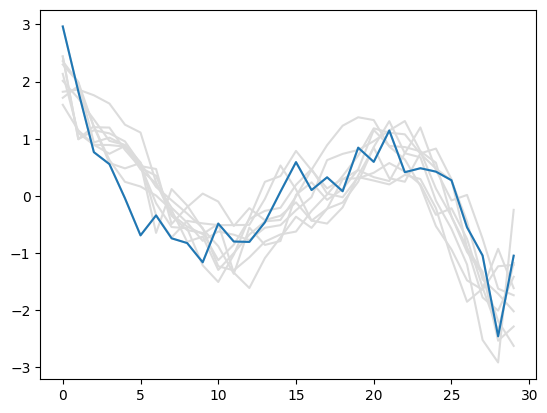

In [85]:
for row in recommendation_df.head(10).iterrows():
    id = row[0]
    if id !=0:
        plt.plot(df_reco_1.loc[id], color='gainsboro')
        
plt.plot(df_reco_1.loc[id])

### Get movies metadata

Get data

In [153]:
movie_meta = pd.read_csv('./raw_data/movie_metadata/movie_meta_data.csv')
movie_meta.columns

Index(['imdbid', 'title', 'akas', 'year', 'metascore', 'imdb user rating',
       'number of imdb user votes', 'awards', 'opening weekend', 'producers',
       'budget', 'script department', 'production companies', 'writers',
       'directors', 'casting directors', 'cast', 'countries', 'age restrict',
       'plot', 'plot outline', 'keywords', 'genres', 'taglines', 'synopsis'],
      dtype='object')

In [152]:
movie_meta = movie_meta[['title', 'keywords', 'genres']]

Index(['imdbid', 'title', 'keywords', 'genres', 'meta'], dtype='object')

In [41]:
movie_meta.head()

,imdbid,title,keywords,genres
0,120770,A Night at the Roxbury,"woman-on-top, nightclub, car-accident, 1990s, ...","Comedy, Music, Romance"
1,132512,At First Sight,"visual-agnosia, brother-sister-relationship, r...","Drama, Romance"
2,118661,The Avengers,"good-versus-evil, heroine, evil-man, villain, ...","Action, Adventure, Sci-Fi, Thriller"
3,215545,Bamboozled,"television-industry, african-american, referen...","Comedy, Drama, Music"
4,118715,The Big Lebowski,"rug, nihilism, pornographer, bowling-alley, de...","Comedy, Crime, Sport"


Compute and clean meta data

In [62]:
movie_meta['meta'] = movie_meta['genres'] + ', ' + movie_meta['keywords']

In [63]:
movie_meta['meta'] = movie_meta['meta'].str.replace(',', '')

In [65]:
movie_meta['meta'] = movie_meta['meta'].fillna('')

Convert to vectors

In [67]:
count = CountVectorizer()
count_matrix = count.fit_transform(movie_meta['meta'])
count_df = pd.DataFrame(count_matrix.toarray(), index=movie_meta.index.tolist())

,0,1,2,3,4,5,6,7,8,9,...,25321,25322,25323,25324,25325,25326,25327,25328,25329,25330
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reduce dimensions

In [86]:
svd = TruncatedSVD(n_components=200)
df_reco_2 = svd.fit_transform(count_df)

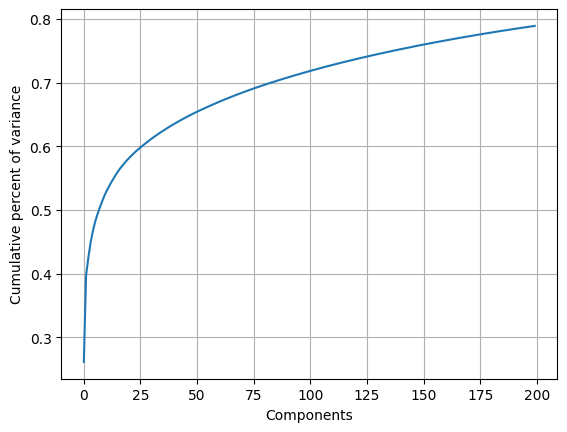

In [79]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [87]:
df_reco_2 = pd.DataFrame(df_reco_2, index=movie_meta.title.tolist())
df_reco_2.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
A Night at the Roxbury,1.502832,-0.803807,-2.006379,-0.793780,-0.829672,0.728085,-0.366592,-0.675100,0.999132,0.615035,...,0.092591,0.029263,0.085645,0.158957,-0.196499,0.099147,0.026102,0.170056,0.110783,0.330340
At First Sight,1.271576,-0.528864,-2.081561,-0.756035,-0.765354,0.251869,-0.732929,-0.698070,1.380662,-0.888438,...,-0.040000,-0.295583,0.054420,-0.197452,-0.230002,-0.137403,-0.137732,0.071036,-0.124401,-0.251339
The Avengers,6.607973,-1.739845,0.476277,1.615551,2.167067,3.640551,0.082123,1.565535,1.681950,1.472499,...,-0.226499,0.700193,-0.309550,0.570306,0.086505,-0.791764,-0.928991,0.161492,0.562070,-0.411429
Bamboozled,58.035444,50.585552,5.012842,2.557669,-2.838908,2.143097,-4.067179,3.284438,-0.802080,-4.157639,...,0.578773,0.759497,-0.536349,-0.485256,-0.817561,-0.342060,1.087672,-0.227805,-0.190412,1.372694
The Big Lebowski,27.097305,-9.668266,-4.641154,-2.699650,5.027355,6.497558,-2.757835,-0.893013,-3.081686,2.475940,...,1.116341,1.026379,0.794119,-0.061640,2.126140,0.167261,1.467899,-0.793853,-0.615852,-2.291467


### Find similar movies based on arcs and meta

Compute similarities for a movie

In [144]:
movie_ex1 = np.array(df_reco_1.loc['Titanic']).reshape(1, -1)
movie_ex2 = np.array(df_reco_2.loc['Titanic']).reshape(1, -1)

similarity_score1 = cosine_similarity(df_reco_1, movie_ex1)
similarity_score2 = cosine_similarity(df_reco_2, movie_ex2)

Regroup in a DataFrame

In [145]:
scores_df1 = pd.DataFrame(similarity_score1, index = df_reco_1.index)
scores_df1.sort_values(0, ascending=False, inplace=True)
scores_df1.columns = ['arcs']

scores_df2 = pd.DataFrame(similarity_score2, index = df_reco_2.index)
scores_df2.sort_values(0, ascending=False, inplace=True)
scores_df2.columns = ['meta']

In [149]:
scores_df = pd.merge(scores_df1, scores_df2, left_index=True, right_index=True)

Compute a global score and select movies

In [154]:
scores_df['total'] = (scores_df['arcs'] + scores_df['meta']) / 2.0

scores_df.sort_values(by=['total'], ascending=False, inplace=True)

scores_df.drop(['Titanic'], inplace=True)

scores_df.head(5)

,arcs,meta,total
movie_name,,,
I Still Know What You Did Last Summer,0.939734,0.554314,0.747024
Life of Pi,0.861108,0.625644,0.743376
The Accountant,0.834970,0.617761,0.726365
The Duchess of Langeais,0.831753,0.611522,0.721638
Ghost Ship,0.743468,0.699575,0.721522


In [161]:
scores_df[:3].index.to_list()

['I Still Know What You Did Last Summer', 'Life of Pi', 'The Accountant']

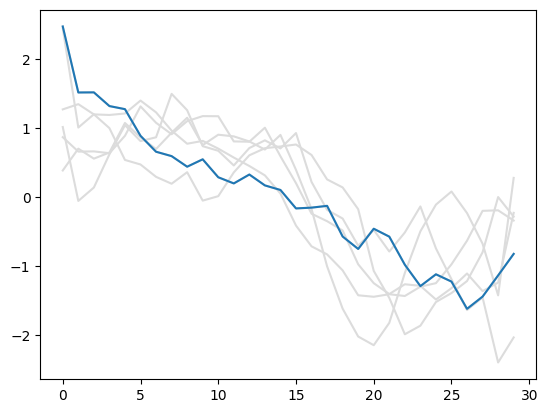

In [155]:
for row in scores_df.head(6).iterrows():
    id = row[0]
    plt.plot(df_reco_1.loc[id], color='gainsboro')
        
plt.plot(df_reco_1.loc[id])

### Test the function

In [165]:
from movie_sentiment.ml_logic.recommendation import get_movies_recommendation

In [177]:
get_movies_recommendation('Up', n=5)

Loading data from pickle file
Loading metadata from pickle file


['Coco',
 'How to Train Your Dragon',
 'To Kill a Mockingbird',
 'Jojo Rabbit',
 'Beauty and the Beast']